# Part 1 - Chart a Straight Line

## Introduction
-- The following project explores how to perform linear regressions on data and use that information to create a predictive model.

## Imports

In [30]:
import jupyterlab
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import scipy

## Plotting Fahrenheit and Celsius Temperatures

### Relationship Between Fahrenheit and Celsius

In [31]:
c=lambda f:5/9*(f-32)

In [32]:
temps=[(f,c(f)) for f in range (0,101,10)]

### Pulling and Investigating Temperature Data

In [33]:
temps_df=pd.DataFrame(temps,columns=['Fahreneit','Celsius'])


In [34]:
temps_df.columns

Index(['Fahreneit', 'Celsius'], dtype='object')

In [35]:
temps_df.head()

,Fahreneit,Celsius
0,0,-17.78
1,10,-12.22
2,20,-6.67
3,30,-1.11
4,40,4.44


### Graphing Temperature Data

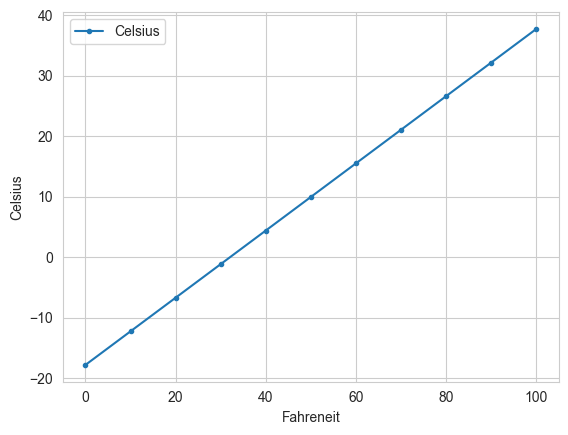

In [36]:
axes= temps_df.plot(x='Fahreneit', y='Celsius', style='.-')
y_label=axes.set_ylabel('Celsius')

## NOAA Weather Data

### Section 1- Data Aquisition

In [37]:
nyc=pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2- Data Inspection

In [38]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90
3,189801,39.60,2.20
4,189901,36.40,-1.00


In [39]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.50,-1.90
120,201501,36.10,-1.30
121,201601,40.80,3.40
122,201701,42.80,5.40
123,201801,38.70,1.30


### Section 3- Data Cleaning

In [40]:
nyc.columns=['Date','Temperature','Anomaly']

In [41]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.20,-3.20
1,189601,34.70,-2.70
2,189701,35.50,-1.90


In [42]:
nyc.Date.dtype

dtype('int64')

In [43]:
nyc.Date=nyc.Date.floordiv(100)

In [44]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.20,-3.20
1,1896,34.70,-2.70
2,1897,35.50,-1.90


### Section 4- Descriptive Statistics

In [45]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [46]:
nyc.Temperature.describe()

count   124.00
mean     37.60
std       4.54
min      26.10
25%      34.58
50%      37.60
75%      40.60
max      47.60
Name: Temperature, dtype: float64

### Section 5- Build the Model

In [47]:
from scipy import stats

In [48]:
linear_regression=stats.linregress(x=nyc.Date,y=nyc.Temperature)

In [49]:
linear_regression.slope

np.float64(0.014771361132966163)

In [50]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6- Predict

In [51]:
linear_regression.slope*2024+linear_regression.intercept

np.float64(38.5922281667978)

In [52]:
linear_regression.slope*1890+linear_regression.intercept

np.float64(36.612865774980335)

In [53]:
sns.set_style('whitegrid')

(10.0, 70.0)

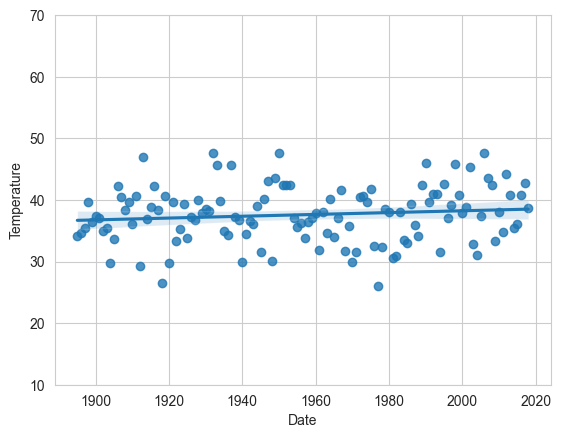

In [54]:
axes=sns.regplot(x=nyc.Date,y=nyc.Temperature)
axes.set_ylim(10,70)